## [일반과제] 판다스(pandas)를 사용한 data manipulation 

### 20181061 전하영
-----------------------

Kaggle에서 제공하는 flight 데이터 3개를 이용하여 data manipulation 연습 및 자신의 이해를 기반으로 한 설명을 단다. 
- 데이터 출처 https://www.kaggle.com/usdot/flight-delays
- data manipulation 과정 https://www.mit.edu/~amidi/teaching/data-science-tools/tutorial/data-manipulation-with-python/
------------------------

### 0. 필요한 라이브러리 import 하기
구현에 필요한 데이터를 import 해와야한다.
data manipulation에 필요한 라이브러리는 아래와 같다.

In [31]:
import os
import pandas as pd
import numpy as np
import datetime as dt

- os는 파일을 관리하기 위해 사용하는 라이브러리 이다.
- pandas는 데이터조작, 데이터전처리를 하기 위해 사용하는 라이브러리 이다.
- numpy는 데이터를 연산하기위해 사용하는 라이브러리 이다.
- datetime는 날짜 계산을 위해 사용하는 라이브러리 이다.
---------------------------------------

### 1. 데이터 전처리
#### 1.1 데이터 불러오기
kaggle 에서 다운로드 받은 flight csv 데이터 3개에서 데이터 프레임을 불러온다.

In [33]:
flights_df_raw = pd.read_csv('flights.csv')
airports_df = pd.read_csv('airports.csv')
airlines_df = pd.read_csv('airlines.csv')

여기서 사용한 ```read_csv()``` 는 외부의 csv확장자 파일을 읽어와서 데이터프레임으로 변환하는 함수이다.             

위에서 불러온 ```flight_df_raw``` 데이터프레임의 자료구조를 확인해본다.
이때 사용하는 함수는 ```.info()``` 이다. 
데이터 값의 타입을 보여주고 자료값의 대표적인 통계값을 요약하여 출력해준다.

In [34]:
flights_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

위의 출력에서 데이터프레임에는 약 580만개의 데이터가 있으며, 
데이터 컬럼(열) 은 31개가 있는것을 알 수 있습니다.

#### 1.2 데이터 품질 확인 
열의 통계를 보여주는 함수로 ```.describe()``` 가 있다.
이를 활용해 누락된 값이 있는지, 맞지않는 값이 있는지 확인한다.
- 데이터 요약 , 열에 대한 요약을 수행됨
- 누락된 데이터(NaN ,  null)는 제외하고 데이터 요약이 수행됨

In [35]:
flights_df_raw.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


위의 출력에서 컬럼 별 결측값의 개수를 확인해보았다.
```isnull()``` 과 ```sum()``` 을 사용하면 확인할 수 있다고 한다.
- ```isnull()``` 은 데이터프레임에서 null 값 결측치를 찾는 함수이다.
- ```sum()```은 말 그대로 합계를 가져오는 함수이다.

In [36]:
flights_df_raw.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

위의 결과를 보면 숫자가 0인 컬럼은 결측치가 없다는 뜻이며, 숫자가 0이 아닌 컬럼은 결측치가 존재한다는 뜻이다. 
하지만 여기서 보면, 특정 컬럼에 결측치가 과하게 많다.
여기에서 결측치가 포함된 열을 제거하게 되면 행이 몽땅 삭제되어 entrie 가 0개가 될 것이 분명하다.

교수님께서 제공해준 링크를 따라, 일부 컬럼만 남겨두고 모두 제거 해 주어야 할 듯하다.

이때 사용하는 함수는 `drop()` 이다. `drop()` 함수는 원본 데이터를 건들지 않기 때문에 `inplace = True` 옵션을 주어야 한다. 

In [37]:
flights_df_raw.drop(['TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','DISTANCE','WHEELS_ON','TAXI_IN','SCHEDULED_ARRIVAL','ARRIVAL_TIME','ARRIVAL_DELAY','DIVERTED','CANCELLED','CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis=1,inplace=True)

특정 컬럼이 잘 제거 되었는지 확인한다. `info()`로 확인해본다.

In [38]:
flights_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
dtypes: float64(2), int64(6), object(4)
memory usage: 532.8+ MB



여기에서 결측값이 있는 행을 제거해주어야 한다.
이 때 ```dropna()```메소드를 사용한다. 

- ```dropna()```로 결측값이 들어있는 행 전체를 제거할 수 있음


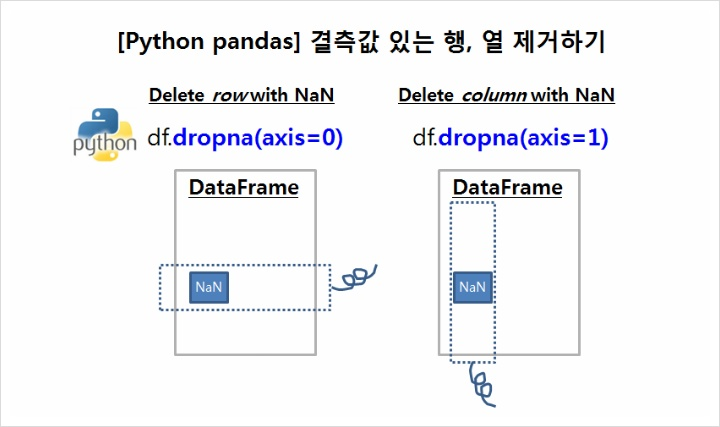
출처 : https://rfriend.tistory.com/263

결측치가 있는 행을 모두 제거한 후, 결측치가 모두 제거되었는지 확인한다.
`dropna()` 함수는 NaN값이 없는 새 데이터 세트를 반환하기 때문에 변수에 재할당 해 주어야 한다.
똑같은 이름의 변수에 다시 할당 해주었다.


In [39]:
flights_df_raw=flights_df_raw.dropna()

In [47]:
flights_df_raw.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
dtype: int64

위의 숫자가 모두 0이 되었기때문에 결측치가 모두 제거되었음을 확인할 수 있다.

다음은, `departure_delay` 출발 지연의 최대값이 1988분(33시간) 임을 알 수 있다. 1440분(24시간) 이상 지연되는 항공편은 필터링 하도록 한다.

이때 숫자는 지수 형태로 표현하는데, 1440은 `1.44e+3` 이다.

In [46]:
flights_df_raw.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY
count,5732926.0,5.732926e+06,5.732926e+06,5.732926e+06,5.732926e+06,5.732926e+06,5.732926e+06,5.732926e+06
mean,2015.0,6.547211e+00,1.570853e+01,3.932391e+00,2.165226e+03,1.328964e+03,1.335204e+03,9.370158e+00
std,0.0,3.397111e+00,8.774777e+00,1.986192e+00,1.755119e+03,4.834728e+02,4.964233e+02,3.708094e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.280000e+02,9.160000e+02,9.210000e+02,-5.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.681000e+03,1.325000e+03,1.330000e+03,-2.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.213000e+03,1.730000e+03,1.740000e+03,7.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.794000e+03,2.359000e+03,2.400000e+03,1.988000e+03


In [48]:
mask = (flights_df_raw['DEPARTURE_DELAY'] < 1.44e+03)
flights_df_raw = flights_df_raw[mask]
flights_df_raw.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY
count,5732894.0,5.732894e+06,5.732894e+06,5.732894e+06,5.732894e+06,5.732894e+06,5.732894e+06,5.732894e+06
mean,2015.0,6.547214e+00,1.570852e+01,3.932391e+00,2.165232e+03,1.328966e+03,1.335206e+03,9.361501e+00
std,0.0,3.397109e+00,8.774776e+00,1.986190e+00,1.755121e+03,4.834724e+02,4.964235e+02,3.689854e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.280000e+02,9.160000e+02,9.210000e+02,-5.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.681500e+03,1.325000e+03,1.330000e+03,-2.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.213000e+03,1.730000e+03,1.740000e+03,7.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.794000e+03,2.359000e+03,2.400000e+03,1.433000e+03


`DEPARTURE_DELAY` 컬럼의 max 값이 `1.433000e+03` , `1433` 으로 조정되었다.

다음은 `FLIGHT_NUMBER` 컬럼을 `astype()` 함수를 이용해 정수에서 문자 값으로 형변환 한다.

- astype() 는 데이터프레임.astype({'컬럼명':데이터타입, ...}) 식으로 적어줌


In [49]:
flights_df_raw = flights_df_raw.astype({'FLIGHT_NUMBER': 'str'})

In [50]:
flights_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5732894 entries, 0 to 5819078
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        object 
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
dtypes: float64(2), int64(5), object(5)
memory usage: 568.6+ MB


정상적으로 문자열(object) 로 변경되었다.

#### 1.3 열 수정
기존의 열을 수정하고, 나중에 유용하게 사용할 열을 추가한다.
그 전에, 데이터를 미리 한번 출력해본다. 
`head()` 를 사용하여 처음 5개의 행을 출력해보겠다.

In [51]:
flights_df_raw.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0


In [52]:
flights_df_raw.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,14.0,15.0


여기에 보면, 불필요하게 Year, Month, DAY가 흩어져있다. 이를 사용하기 편하게 하나의 컬럼으로 합쳐준다. 이때 `datetime` 형식을 사용하여 새로운 열을 추가한다. 기존 열을 통합하는 방법은 `assign()` 이다. 
-`assign`안에 합칠 컬럼을 적어줌

In [55]:
def convert_to_timedate(x, col='SCHEDULED_DEPARTURE'):
    'Converts to timestamp'
    return (
        pd.to_datetime(
            x['YEAR'].astype(str) + '-' + x['MONTH'].astype(str) + '-' + x['DAY'].astype(str) +
            ' ' + x.assign(zero='0')['zero'] * (4 - x[col].astype(str).str.len()) +
            x[col].astype(str), format='%Y-%m-%d %H%M', errors='coerce'
        )
    )

그리고, 항공편이 지연되었는지 아닌지에 대한 이진 답변이 필요하다.
15분 이상 지연된 항공편을 지연되었다고 간주하고 `np.select()` 를 사용하여 플래그를 추가한다.

아래의 코드를 적용해본다.

#### 1.4 처리 요약

In [57]:
flights_df = (
    flights_df_raw
    # All rows should not have any null value
    .dropna()
    # Only flights from set of airports and with reasonable delay amount
    [lambda x:
         (x['ORIGIN_AIRPORT'].isin(['BOS', 'SFO', 'LAX', 'JFK'])) &
         (x['DEPARTURE_DELAY'] <= 24*60)
    ]
    # Fix columns
    .assign(
        flight_number=lambda x: x['FLIGHT_NUMBER'].astype(str),
        scheduled_departure=lambda x: convert_to_timedate(x),
        is_delayed=lambda x: np.select(
            [x['DEPARTURE_DELAY'] >= 15], [1],
            default=0
        )
    )
    # Remove redundant columns
    .drop(['YEAR', 'MONTH', 'DAY'], axis=1)
)

In [58]:
flights_df.describe()

,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,is_delayed
count,535744.000000,535744.000000,535744.000000,535744.000000,535744.000000
mean,3.929547,1335.677180,1333.794021,10.847399,0.205292
std,1.990503,515.500947,530.721843,37.724875,0.403915
min,1.000000,1.000000,1.000000,-38.000000,0.000000
25%,2.000000,900.000000,900.000000,-5.000000,0.000000
50%,4.000000,1310.000000,1318.000000,-1.000000,0.000000
75%,6.000000,1739.000000,1747.000000,9.000000,0.000000
max,7.000000,2359.000000,2400.000000,1429.000000,1.000000


In [60]:
flights_df.head()

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,flight_number,scheduled_departure,is_delayed
1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,2336,2015-01-01 00:10:00,0
2,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,840,2015-01-01 00:20:00,0
3,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,258,2015-01-01 00:20:00,0
5,4,DL,806,N3730B,SFO,MSP,25,20.0,-5.0,806,2015-01-01 00:25:00,0
7,4,US,2013,N584UW,LAX,CLT,30,44.0,14.0,2013,2015-01-01 00:30:00,0


새롭게 생성한 `flights_df`에 `describe()` 와 `head()`를 적용하여 새로운 컬럼이 잘 생성되었는지, 기존 컬럼이 잘 제거되었는지 확인하다. 기존의 수많던 데이터가 많이 압축되었다. 

------------------------------

### 2. 조인 집계
조인, 집계 부분에서는 pandas를 사용한 data manipulation을 통해 다양한 각도에서 데이터를 탐색한다.

#### 2.1 공항 이름 가져오기
이전 윗 부분 코드에서 불러온 `airports_df`와 방금 만든 `flights_df` 를 `merge()` 를 통해 두개의 데이터 프레임을 합친다.
- `merge()` 는 각 데이터에 존재하는 고유값(key)을 기준으로 병합할 때 사용.
```python pd.merge(df_left, df_right, how='inner', on=None)```이 `default` 값이다.
위의 두개의 데이터 프레임을 합쳐 새로운 result라는 변수에 재할당 해준다.

In [64]:
airports_df.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


불러온 csv파일은 모든 컬럼 명이 대문자 이다. 이를 항상 유의해서 작업한다.
계속 오류가 발생해서 적어두는 메모..

In [65]:
result = (
  flights_df
  .merge(airports_df, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')
)

`head()` 구문을 통해 `flights_df` 와 `airports_df` 가 정상적으로 `result`에 합쳐졌는지 확인해본다.

In [66]:
result.head()

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,flight_number,scheduled_departure,is_delayed,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,2336,2015-01-01 00:10:00,0,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,258,2015-01-01 00:20:00,0,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
2,4,US,2013,N584UW,LAX,CLT,30,44.0,14.0,2013,2015-01-01 00:30:00,0,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
3,4,DL,1434,N547US,LAX,MSP,35,35.0,0.0,1434,2015-01-01 00:35:00,0,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
4,4,AA,115,N3CTAA,LAX,MIA,105,103.0,-2.0,115,2015-01-01 01:05:00,0,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807


정상적으로 합쳐진 것을 확인할 수 있다. `ORIGIN_AIRPORT` 와 `IATA_CODE` 가 같으면 `airports_df` 의 행을 `flights_df` 에 합쳐준다.

#### 2.2 공항 당 항공편 수
연중 공항 당 출발한 항공편 수를 확인한다. 이 때 `groupby()` 와 `apply()` 를 사용한다.
- `groupby()` 는 집단, 그룹별로 데이터를 집계, 요약한다.
- `apply()` 는 각 그룹별로 어떠한 함수를 적용한다.
주로 , 전체 데이터를 그룹별로 나누고 각 그룹별로 집계함수를 적용한 다음 그룹별 집계 결과를 하나로 합치는 단계를 거친다.

아래의 코드를 적용하여 공항 별 항공편 수를 얻는다.

In [68]:
result = (
  flights_df
  .groupby(['ORIGIN_AIRPORT'])
  .apply(lambda x: pd.Series({
      'nb_flights': len(x['FLIGHT_NUMBER'])
  }))
  .reset_index()
)

In [69]:
result.head()

,ORIGIN_AIRPORT,nb_flights
0,BOS,105276
1,JFK,91933
2,LAX,192584
3,SFO,145951


#### 2.3 대형 항공사의 지연된 항공편
여기에서 말하는 대형 항공사는 연간 항공편 수로 정한다.
지연된 항공편의 비율을 알고자 한다.

1. `flight_df` 에서 `AIRLINE` 컬럼을 기준으로 `groupby()` 를 진행한다. 여기서 `groupby()`의 역할은  항공사의 규모를 계산하고, 지연 통계를 계산하는 것이다.
2. 그 다음, 항공편 수에 따른 항공사 규모 순위가 `lambda` 함수를 통해 계산된다. 
3. 항공편이 가장 많은 상위 10개의 항공사에 `lambda` 함수를 계속 적용한다.
4. 위의 `airlines_df` 를 `IATA_CODE` 컬럼과 `merge()` 한다. 
이 부분은 아직 이해를 잘 하지 못하여 코드 그대로 해석해보았다.

In [73]:
result = (
  flights_df
  # Compute airline size and delay statistics
  .groupby(['AIRLINE'])
  .apply(lambda x: pd.Series({
      'nb_flights': len(x['FLIGHT_NUMBER']),
      'perc_delayed': round(np.average(x['is_delayed']), 4)
  }))
  .reset_index()
  # Keep biggest airlines
  .assign(rank_size=lambda x: x['nb_flights'].rank(method='first', ascending=False))
  [lambda x: x['rank_size'] <= 10]
  .drop('rank_size', axis=1)
  # Display airline name
  .merge(airlines_df, left_on='AIRLINE', right_on='IATA_CODE')
  .reset_index(drop=True)
)

In [74]:
result.head()

,AIRLINE_x,nb_flights,perc_delayed,IATA_CODE,AIRLINE_y
0,AA,77024.0,0.1535,AA,American Airlines Inc.
1,AS,14655.0,0.1252,AS,Alaska Airlines Inc.
2,B6,85920.0,0.2080,B6,JetBlue Airways
3,DL,73821.0,0.2016,DL,Delta Air Lines Inc.
4,NK,6475.0,0.3158,NK,Spirit Air Lines


현재 마지막 컬럼 명이 불명확하다. 이를 `rename()` 함수를 통해 다시 바꿔준다.

In [77]:
result = result.rename({'AIRLINE_x':'AIRLINE','AIRLINE_y':'AIRLINE_NAME'},axis=1)
result.head()

,AIRLINE,nb_flights,perc_delayed,IATA_CODE,AIRLINE_NAME
0,AA,77024.0,0.1535,AA,American Airlines Inc.
1,AS,14655.0,0.1252,AS,Alaska Airlines Inc.
2,B6,85920.0,0.2080,B6,JetBlue Airways
3,DL,73821.0,0.2016,DL,Delta Air Lines Inc.
4,NK,6475.0,0.3158,NK,Spirit Air Lines


### 3. 데이터 프레임 변환
pandas 를 활용하여 기존 데이터프레임을 활용한 새로운 정보를 얻고자 한다.

#### 3.1 공항별 지연의 시간적 진화
출발지 공항 별 지연의 월별 변화를 얻고자 한다.
예시를 들자면, 1월에는 지연이 10%이며, 2월에는 지연이 20%... 식으로 데이터를 얻어 새로운 컬럼에 추가하고자 한다.

이번에는 이해가 어려워 우선 코드를 적용해보았다.

In [79]:
result = (
    flights_df
    # Create column specific full month name
    .assign(
        month=lambda x: x['scheduled_departure'].dt.strftime('%B'),
        month_num=lambda x: x['scheduled_departure'].dt.strftime('%m').astype(int)
    )
    # Compute aggregation
    .groupby(['ORIGIN_AIRPORT', 'month', 'month_num'])
    .apply(lambda x: pd.Series({
        'perc_delayed': round(np.average(x['is_delayed']), 4)
    }))
    .reset_index()
    # Reshape data frame
    .pivot_table(
        columns='ORIGIN_AIRPORT',
        values='perc_delayed',
        index=['month', 'month_num'],
        aggfunc=np.sum
    )
    .rename_axis(None, axis=1)
    .reset_index()
    # Order by month
    .sort_values(['month_num'])
    .drop(['month_num'], axis=1)
    .reset_index(drop=True)
)

In [80]:
result.head()

,month,BOS,JFK,LAX,SFO
0,January,0.1902,0.2257,0.1738,0.2001
1,February,0.3248,0.3174,0.1978,0.2222
2,March,0.1984,0.2736,0.2246,0.1770
3,April,0.1553,0.2020,0.1855,0.1756
4,May,0.1552,0.1552,0.1990,0.2297


해석한 바는 다음과 같다.
1. `flights_df` 데이터 프레임에 새로운 컬럼을 추가한다. 추가는 `assign()` 함수로 하며, `lambda` 함수로 추가할 데이터를 무명으로 지정해준다. 여기서 추가할 데이터는 `month` 와 `month_num` 이다. `month` 는 기존 `flights_df`에 있는 `scheduled_departure`에서 월 이름을 가져오고, `month_num` 은 `scheduled_departure` 에서 몇월인지에 대한 월의 숫자를 가져온다. 그리고 가져온 값을 `astype()` 함수로 `int`형으로 변경해준다.

2. `ORIGIN_AIROIRT` 와 `month`, `month_num` 을 기준으로 `groupby()` 를 진행하며, 이때 `apply()` 를 사용해서 함수를 적용해준다. 여기서의 함수는 `is_delayed`의 값을 평균내는 역할을 한다.
3. 그 이후에는 적당한 처리를 통해 순서대로 볼 수 있도록 한다.



#### 3.2 매 월 항공편의 변경 률
다음은, 월별 항공편의 변경률을 얻고자 한다.
이전의 방법과 유사하게 진행하며, 일부의 함수만 변경해준다.


In [81]:
result = (
    flights_df
    # Create column specific full month name
    .assign(
        month=lambda x: x['scheduled_departure'].dt.strftime('%B'),
        month_num=lambda x: x['scheduled_departure'].dt.strftime('%m').astype(int)
    )
    # Compute aggregation
    .groupby(['ORIGIN_AIRPORT', 'month', 'month_num'])
    .apply(lambda x: pd.Series({
        'nb_flights': len(x['flight_number'])
    }))
    .reset_index()
    .sort_values(['ORIGIN_AIRPORT', 'month_num'])
    .reset_index(drop=True)
    # Get lagged values
    .assign(
        nb_flights_before=lambda x:
            x.groupby(['ORIGIN_AIRPORT'])['nb_flights'].shift(1),
        perc_chance=lambda x:
            round((x['nb_flights'] - x['nb_flights_before']) / x['nb_flights_before'], 2)
    )
    # Last touches
    .drop(['month_num'], axis=1)
)

In [82]:
result.head()

,ORIGIN_AIRPORT,month,nb_flights,nb_flights_before,perc_chance
0,BOS,January,8201,NaN,NaN
1,BOS,February,7251,8201.0,-0.12
2,BOS,March,9744,7251.0,0.34
3,BOS,April,9940,9744.0,0.02
4,BOS,May,10172,9940.0,0.02


#### 3.3 출발지 별 가장 인기있는 노선
출발지 공항 당 상위 3개의 노선을 얻고자 한다. 
인기 노선의 기준은 항공편의 수로 정한다.

다른부분은 거의 이해하겠으나 `pivot_table()` 이 좀 아까부터 낯설었다. 이를 해결해보고자 했다.
이는, 행과 열을 회전? 하는 듯 하였고, 엑셀에도 비슷한 기능이 있다고 한다.
데이터 테이블을 원하는대로 재배치하는 기능을 한다고 한다.




In [85]:
result = (
    flights_df
    # Compute volume per route
    .groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])
    .apply(lambda x: pd.Series({
        'nb_flights': len(x['flight_number'])
    }))
    .reset_index()
    # Compute rank within each origin airport and keep top ones
    .assign(
        rank_popular=lambda x:
            x.groupby(['ORIGIN_AIRPORT'])['nb_flights'].rank(method='first', ascending=False)
    )
    [lambda x: x['rank_popular'] <= 3]
    .reset_index(drop=True)
    .drop(['nb_flights'], axis=1)
    .assign(rank_popular=lambda x: 'top_' + x['rank_popular'].astype(int).map(str))
    # Reformat results
    .pivot_table(
        columns='rank_popular',
        values='DESTINATION_AIRPORT',
        index='ORIGIN_AIRPORT',
        aggfunc=np.sum
    )
    .rename_axis(None, axis=1)
    .reset_index()
)

In [86]:
result.head()

,ORIGIN_AIRPORT,top_1,top_2,top_3
0,BOS,DCA,LGA,ORD
1,JFK,LAX,SFO,MCO
2,LAX,SFO,JFK,LAS
3,SFO,LAX,JFK,LAS


### 마치며

이번 과제를 마치며, 판다스의 기초를 익혀보았다.
다양한 판다스의 함수를 `.` 으로 이어가면서 조작하다보니 급급히 생각하는 것 보단 천천히 생각해 보아야 할 듯 하다. 마지막의 데이터프레임 변환은 특히 `pivot_table()` 을 응용할 줄 알아야 잘 사용할 수 있을 듯 하였다. 이 과정을 잘 복습해두고 수시로 공부하여야 할 듯 하다. 처음에 코드를 봤을땐 코드가 너무 길어서 막막했지만 천천히 단계별로 코드를 해석해보니 생각보다 이해가 되었다. pandas에서 제공하는 기본 함수를 잘 익혀 원하는대로 데이터를 가공할 수 있도록 연습해야겠다.
